In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import TransferFunction, tf2zpk

for Kc = 0.1, the poles are:  [-0.18042662 -0.08624005]
for Kc = 0.2, the poles are:  [-0.13333333+0.00298142j -0.13333333-0.00298142j]
for Kc = 1.0, the poles are:  [-0.13333333+0.1334999j -0.13333333-0.1334999j]
for Kc = 10.0, the poles are:  [-0.13333333+0.46714261j -0.13333333-0.46714261j]


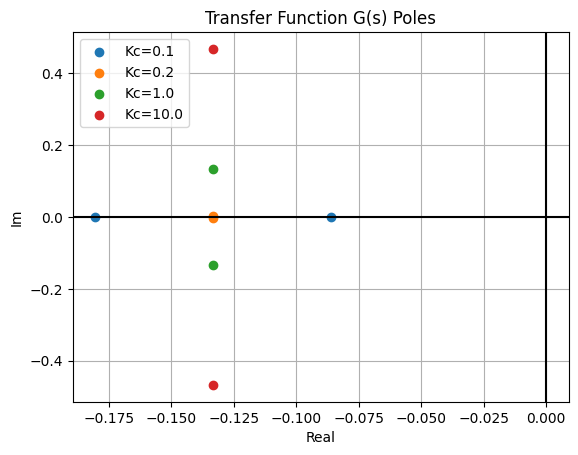

In [2]:
K_c = [0.1, 0.2, 1.0, 10.0]
poles_list = []

numerator = [1]

for i in range(len(K_c)):
    denominator = [5*15, 5+15, 1 + K_c[i] * 0.167 * 10]
    zeroes, poles, _ = tf2zpk(numerator, denominator)
    print("for Kc = {}, the poles are: ".format(K_c[i]), poles)
    poles_list.append(poles)
    plt.scatter(np.real(poles), np.imag(poles), label=f'Kc={K_c[i]}')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Transfer Function G(s) Poles')
plt.xlabel('Real')
plt.ylabel('Im')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
damping_factors = {}

for i, poles in enumerate(poles_list):

    real_part = np.real(poles[0])
    imag_part = np.imag(poles[0])
    
    damping_factor = -real_part / np.sqrt(real_part**2 + imag_part**2)
    damping_factors[K_c[i]] = damping_factor

for Kc, zeta in damping_factors.items():
    print(f"Kc = {Kc}: Damping Factor (ζ) = {zeta:.4f}")


Kc = 0.1: Damping Factor (ζ) = 1.0000
Kc = 0.2: Damping Factor (ζ) = 0.9998
Kc = 1.0: Damping Factor (ζ) = 0.7067
Kc = 10.0: Damping Factor (ζ) = 0.2745


# Problem 1E

In [4]:
denominator = [5*15, 5+15, 1 + 0.2 * 0.167 * 10]

i = 1
positive_zeros_found = False
while not positive_zeros_found:
    numerator = [i, 1]
    zeroes, poles, gain = tf2zpk(numerator, denominator)

    if i > 1000:
        print("okay, looks like all positive i has negative zeroes")
        break
    
    if all(z > 0 for z in zeroes):
        positive_zeros_found = True
        print("For tau = {}, the zeroes are: {}".format(i, zeroes))
    else:
        print(f"At i = {i}, zeroes: {zeroes} (not all positive yet)")
    
    i += 1


At i = 1, zeroes: [-1.] (not all positive yet)
At i = 2, zeroes: [-0.5] (not all positive yet)
At i = 3, zeroes: [-0.33333333] (not all positive yet)
At i = 4, zeroes: [-0.25] (not all positive yet)
At i = 5, zeroes: [-0.2] (not all positive yet)
At i = 6, zeroes: [-0.16666667] (not all positive yet)
At i = 7, zeroes: [-0.14285714] (not all positive yet)
At i = 8, zeroes: [-0.125] (not all positive yet)
At i = 9, zeroes: [-0.11111111] (not all positive yet)
At i = 10, zeroes: [-0.1] (not all positive yet)
At i = 11, zeroes: [-0.09090909] (not all positive yet)
At i = 12, zeroes: [-0.08333333] (not all positive yet)
At i = 13, zeroes: [-0.07692308] (not all positive yet)
At i = 14, zeroes: [-0.07142857] (not all positive yet)
At i = 15, zeroes: [-0.06666667] (not all positive yet)
At i = 16, zeroes: [-0.0625] (not all positive yet)
At i = 17, zeroes: [-0.05882353] (not all positive yet)
At i = 18, zeroes: [-0.05555556] (not all positive yet)
At i = 19, zeroes: [-0.05263158] (not all pos

In [5]:
denominator = [5*15, 5+15, 1 + 0.2 * 0.167 * 10]

i = 1
positive_zeros_found = False
while not positive_zeros_found:
    numerator = [-i, 1]
    zeroes, poles, gain = tf2zpk(numerator, denominator)
    
    if all(z > 0 for z in zeroes):
        positive_zeros_found = True
        print("For tau = {}, the zeroes are: {}".format(i, zeroes))
    else:
        print(f"At i = {i}, zeroes: {zeroes} (not all positive yet)")
    
    i += 1


For tau = 1, the zeroes are: [1.]


#### Any tau > 0 (non-inclusive) has an inverse response